In [1]:
from keras.applications import VGG16

In [2]:
conv_base = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 12s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
base_dir = '/home/dsc/tfm_data/spanish_food_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [10]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, 4))
    generator = datagen.flow_from_directory(directory, 
                                           target_size=(150, 150), 
                                           batch_size = batch_size, 
                                           class_mode = "categorical")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [11]:
train_features, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 4 classes.


In [12]:
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 1000 images belonging to 4 classes.


In [13]:
test_features, test_labels = extract_features(test_dir, 1000)

Found 1000 images belonging to 4 classes.


In [14]:
train_features.shape

(2000, 4, 4, 512)

In [15]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [16]:
test_features

array([[0.07271027, 0.        , 0.        , ..., 0.        , 0.10103762,
        0.        ],
       [0.03231382, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75084198, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07596818, 0.        , 0.        , ..., 0.        , 0.06016117,
        0.        ],
       [0.28700411, 0.        , 0.        , ..., 0.67219466, 0.24134633,
        0.        ],
       [0.1606926 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

history = model.fit(train_features, train_labels, 
                   epochs = 30, 
                   batch_size = 20, 
                   validation_data = (validation_features, validation_labels))


Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 1.1739 - acc: 0.4823 - val_loss: 0.7010 - val_acc: 0.7170
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 0.6545 - acc: 0.7391 - val_loss: 0.6040 - val_acc: 0.7690
Epoch 3/30
100/100 [==============================] - 1s 14ms/step - loss: 0.5082 - acc: 0.8070 - val_loss: 0.5372 - val_acc: 0.7890
Epoch 4/30
100/100 [==============================] - 2s 15ms/step - loss: 0.4495 - acc: 0.8208 - val_loss: 0.5050 - val_acc: 0.8180
Epoch 5/30
100/100 [==============================] - 2s 17ms/step - loss: 0.3591 - acc: 0.8629 - val_loss: 0.4860 - val_acc: 0.8150
Epoch 6/30
100/100 [==============================] - 2s 15ms/step - loss: 0.3146 - acc: 0.8801 - val_loss: 0.5308 - val_acc: 0.7950
Epoch 7/30
100/100 [==============================] - 2s 20ms/step - loss: 0.2456 - acc: 0.9127 - val_loss: 0.4996 - val_acc: 0.8110
Epoch 8/30
100/100 [==============================] - 2s 21ms/step - 

In [ ]:
# Plotting:

In [20]:
import matplotlib.pyplot as plt

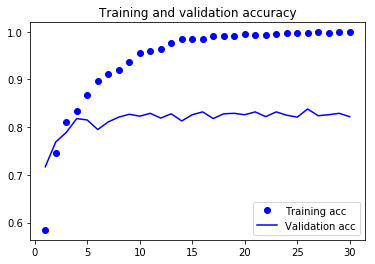

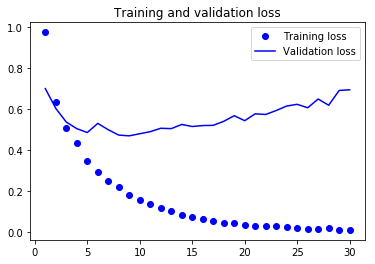

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()